## Import Libraries & Data

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings    
warnings.filterwarnings('ignore')

In [6]:
Hoffman_df= pd.read_csv('Hoffman_Stores_Data.csv')

In [3]:
store_df=pd.read_csv('store.csv')

# Analysing the Hoffman Dataset

In [4]:
Hoffman_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1


In [5]:
Hoffman_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,01-01-2013,0,0,0,0,a,1
1017205,1112,2,01-01-2013,0,0,0,0,a,1
1017206,1113,2,01-01-2013,0,0,0,0,a,1
1017207,1114,2,01-01-2013,0,0,0,0,a,1
1017208,1115,2,01-01-2013,0,0,0,0,a,1


In [6]:
#Checking Information about Dataset
Hoffman_df.shape

(1017209, 9)

In [7]:
Hoffman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
#Checking Null Values
Hoffman_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [9]:
#Summary Statastics
Hoffman_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [10]:
#No. Of Stores in the Dataset
Hoffman_df.Store.nunique()

1115

In [11]:
# Value_counts of StateHoliday Column
Hoffman.StateHoliday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [12]:
# extract year, month, day and week of year from "Date"

Hoffman_df['Date']=pd.to_datetime(Hoffman_df['Date'])
Hoffman_df['Year'] = Hoffman_df['Date'].apply(lambda x: x.year)
Hoffman_df['Month'] = Hoffman_df['Date'].apply(lambda x: x.month)
Hoffman_df['Day'] = Hoffman_df['Date'].apply(lambda x: x.day)

<Axes: xlabel='DayOfWeek', ylabel='count'>

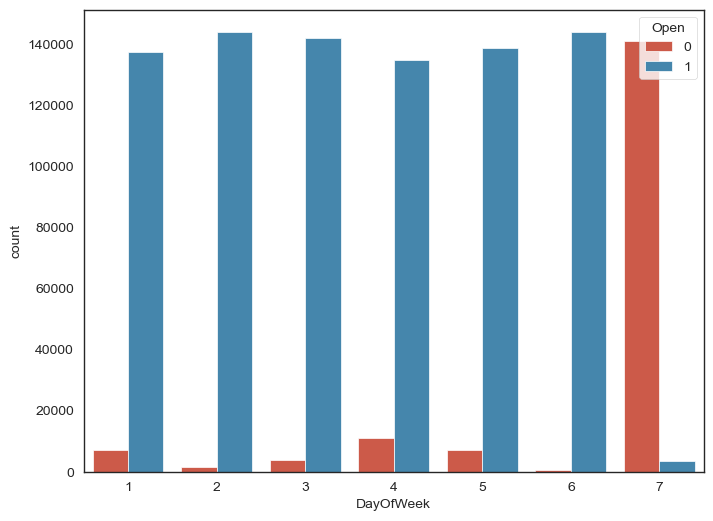

In [13]:
sns.countplot(x='DayOfWeek',hue='Open',data=Hoffman_df)

In [8]:
#sns.countplot(data=Hoffman_df, x="DayOfWeek")

<Axes: xlabel='Promo', ylabel='Sales'>

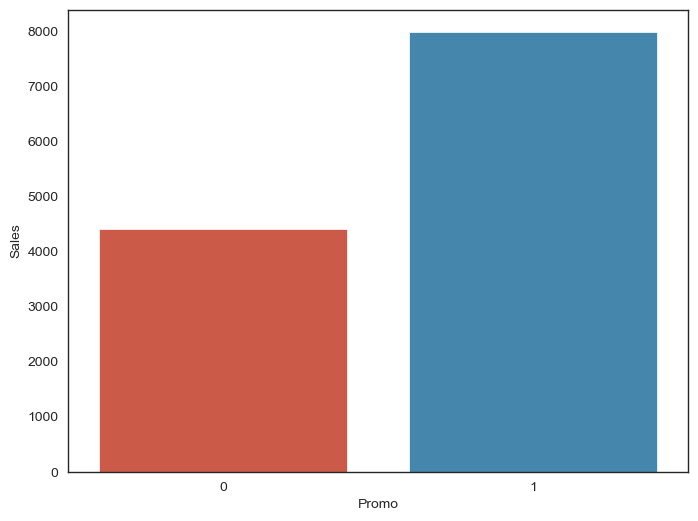

In [14]:
#Impact of promo on sales
Promo_sales = pd.DataFrame(Hoffman_df.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'])

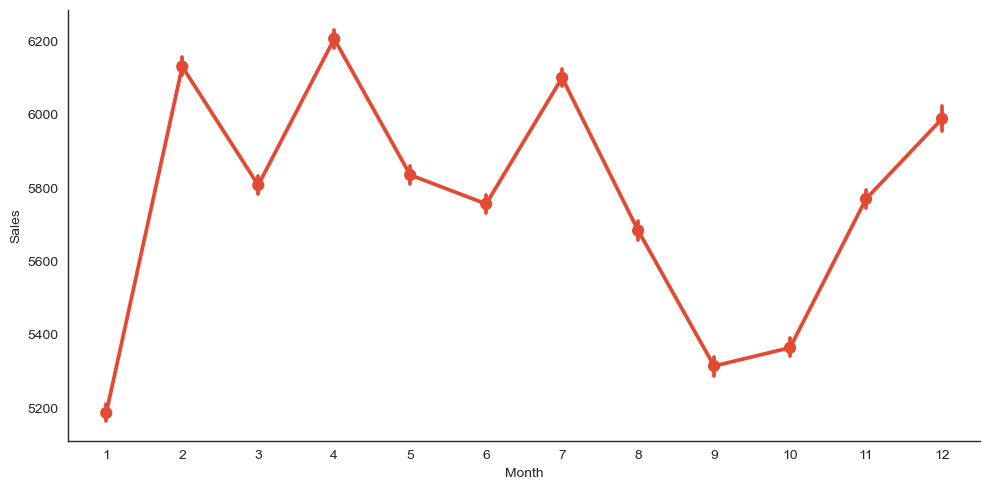

In [15]:
sns.catplot(x="Month" ,y = "Sales" , data=Hoffman_df, kind="point", aspect=2)

In [16]:
Hoffman_df["StateHoliday"] = Hoffman["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

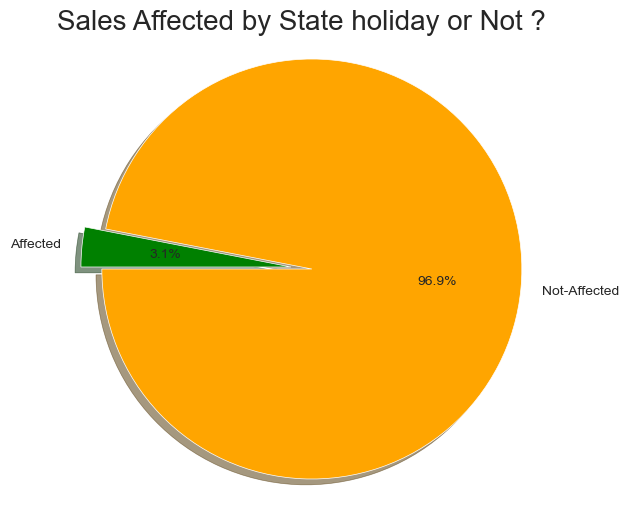

In [17]:
labels = 'Not-Affected' , 'Affected'
sizes = Hoffman_df.StateHoliday.value_counts()
colors = ['orange','green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by State holiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

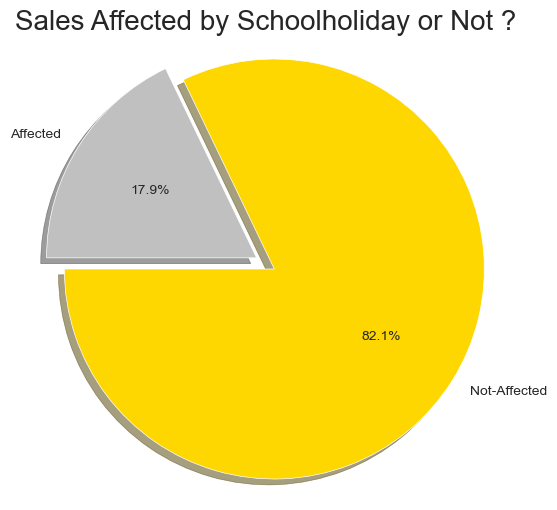

In [18]:
labels = 'Not-Affected' , 'Affected'
sizes = Hoffman_df.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

## Analysing the Store Dataset

In [19]:
store_df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [20]:
store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [21]:
store_df.shape

(1115, 10)

In [22]:
#Checking info of data as data types and rows and cols
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [23]:
#Checking Null Values
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [24]:
# remove features
store_df = store_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

Text(0.5, 1.0, 'Distributin of Store Competition Distance')

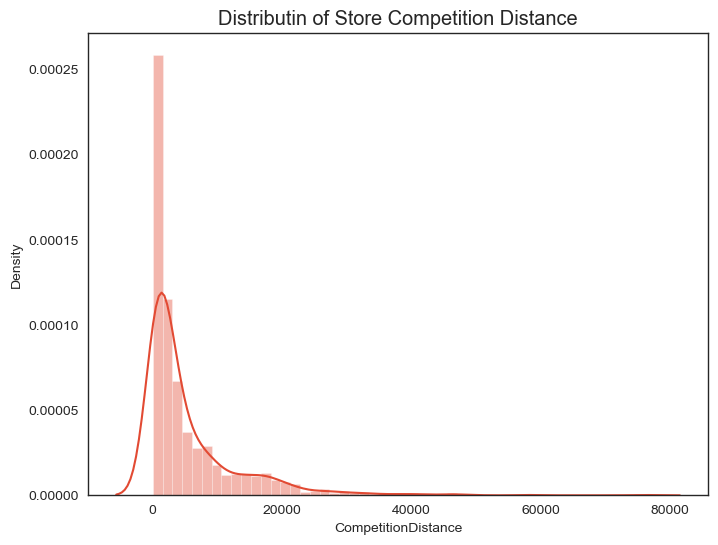

In [25]:
sns.distplot(store_df.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

In [26]:
# replace missing values in CompetitionDistance with median for the store dataset

store_df.CompetitionDistance.fillna(store_df.CompetitionDistance.median(), inplace=True)

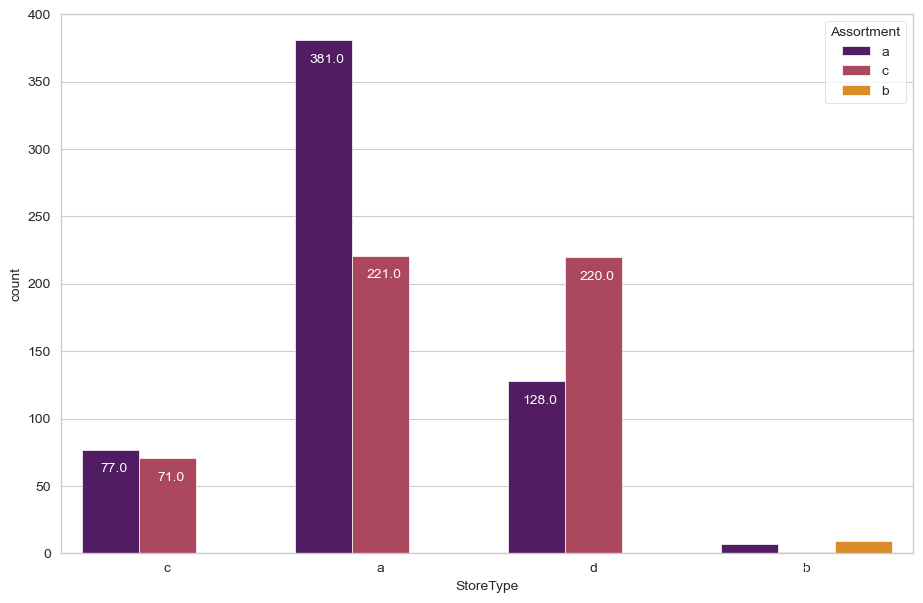

In [27]:
#checking stores with their assortment type 
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
store_type=sns.countplot(x='StoreType',hue='Assortment', data=store_df,palette="inferno")

for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='top', color='white', size=10)

#### Merging Two Datasets

In [28]:
df = pd.merge(Hoffman_df, store_df, how='left', on='Store')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31,a,a,29910.0,0


In [29]:
df.shape

(1017209, 17)

## EDA On Merged Dataset

Heatmap Of Merged Dataset

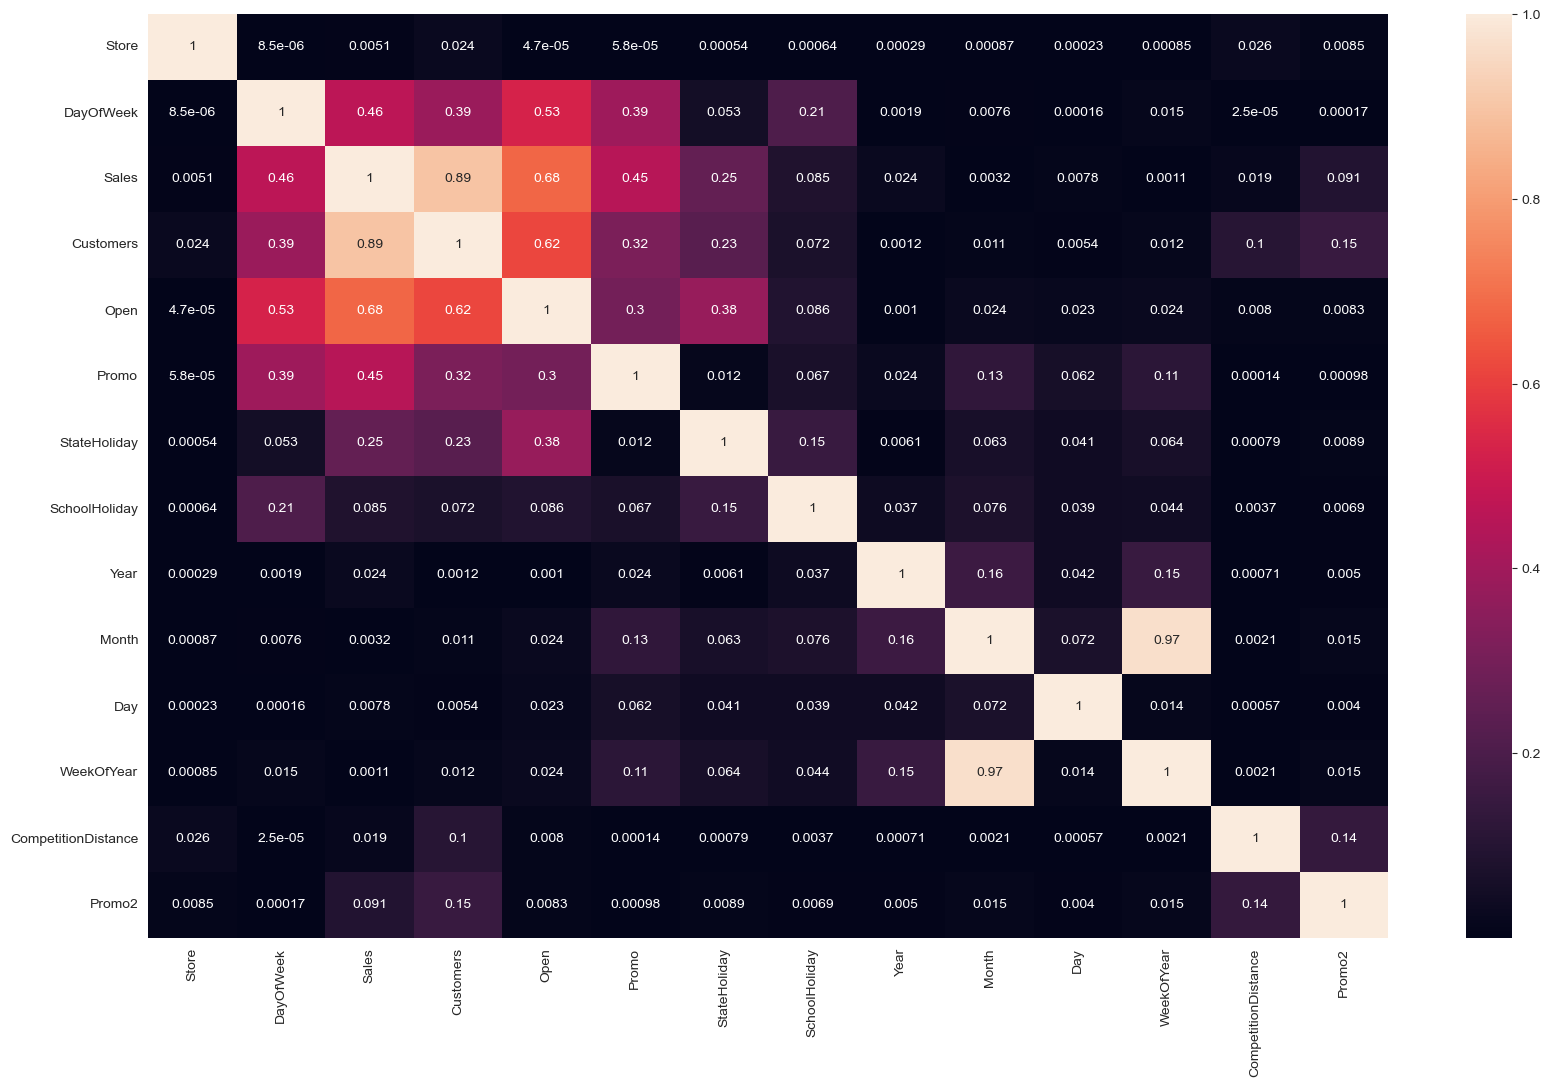

In [30]:
plt.subplots(figsize=(20,12))
sns.heatmap(df.corr().abs(), annot=True)
plt.savefig("heatmap.png")

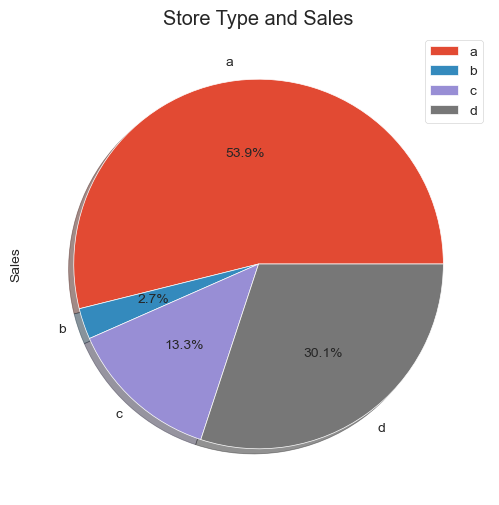

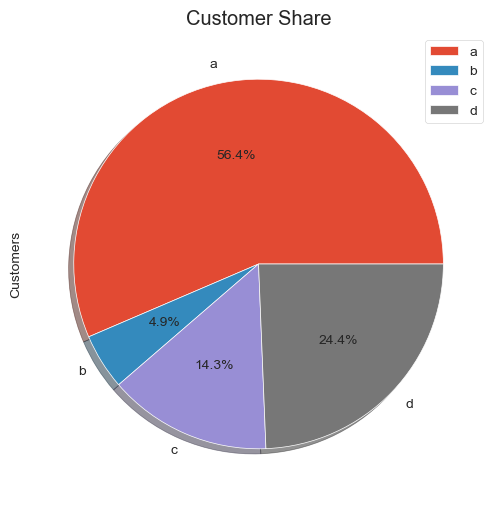

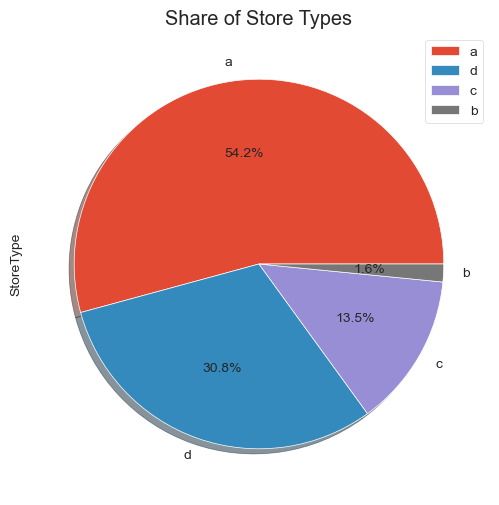

In [31]:
#let's explore store type a bit and it's influence on sales
df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#customers and store type
df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#store types in all of the dataset
df["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

<Axes: >

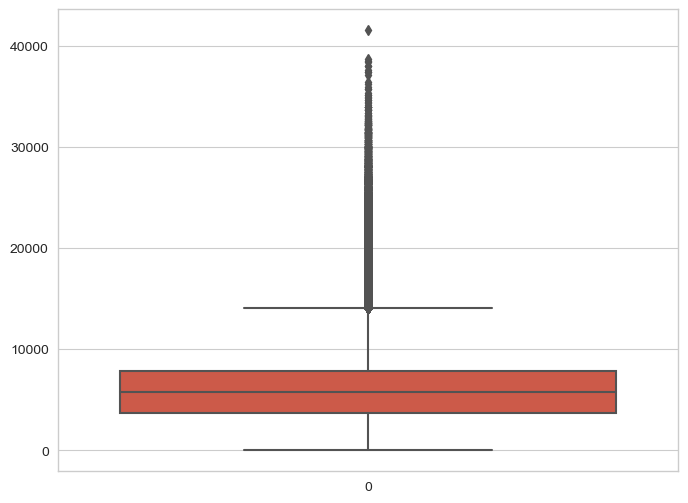

In [32]:
#checking outliers in sales
sns.boxplot(Hoffman_df['Sales'])

In [33]:
#removing outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [34]:
# defining new variable after removing outliers
df= remove_outlier(df, 'Sales')

In [35]:
# where stores are closed, they won't generate sales, so we will remove that part of the dataset
df = df[df.Open != 0]

In [36]:
# Open isn't a variable anymore, so we'll drop it too
df = df.drop('Open', axis=1)

In [37]:
# Check if there's any opened store with zero sales
df[df.Sales == 0]['Store'].sum()

31460

In [38]:
df = df[df.Sales != 0]

In [39]:
df_new=df.copy()

In [40]:
df_new = pd.get_dummies(df_new,columns=['StoreType','Assortment'])

In [41]:
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,...,WeekOfYear,CompetitionDistance,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,0,1,2015,7,...,31,1270.0,0,0,0,1,0,1,0,0
1,2,5,2015-07-31,6064,625,1,0,1,2015,7,...,31,570.0,1,1,0,0,0,1,0,0
2,3,5,2015-07-31,8314,821,1,0,1,2015,7,...,31,14130.0,1,1,0,0,0,1,0,0
3,4,5,2015-07-31,13995,1498,1,0,1,2015,7,...,31,620.0,0,0,0,1,0,0,0,1
4,5,5,2015-07-31,4822,559,1,0,1,2015,7,...,31,29910.0,0,1,0,0,0,1,0,0


In [42]:
X = df_new.drop(['Sales','Store','Date','Year'] , axis = 1)
y= df_new.Sales

In [43]:
X.shape

(817644, 17)

In [44]:
X.head()

,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,Month,Day,WeekOfYear,CompetitionDistance,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,5,555,1,0,1,7,31,31,1270.0,0,0,0,1,0,1,0,0
1,5,625,1,0,1,7,31,31,570.0,1,1,0,0,0,1,0,0
2,5,821,1,0,1,7,31,31,14130.0,1,1,0,0,0,1,0,0
3,5,1498,1,0,1,7,31,31,620.0,0,0,0,1,0,0,0,1
4,5,559,1,0,1,7,31,31,29910.0,0,1,0,0,0,1,0,0


In [45]:
y.head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

### Splitting Dataset Into Training Set and Test Set

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [64]:
columns=X_train.columns

In [47]:
# Using Min max scaler for Better Accuracy
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


scaler.fit(X_train)


X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [49]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_scaled = LinearRegression()
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [50]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [51]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_absolute_percentage_error

print("R2_Score :", r2_score(y_test, y_pred_scaled))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_scaled))
print("*****************************")
print("MAPE :", mean_absolute_percentage_error(y_test, y_pred_scaled))

R2_Score : 0.7819826757771288
*****************************
MAE : 880.2633064812021
*****************************
MAPE : 0.14245976451889078


In [52]:
rf = RandomForestRegressor()
rf_scaled =  RandomForestRegressor()
rf.fit(X_train ,y_train)
rf_scaled.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [54]:
y_pred = rf.predict(X_test)
y_pred_scaled = rf_scaled.predict(X_test_scaled)

In [55]:
print("R2_Score :", r2_score(y_test, y_pred_scaled))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_scaled))
print("*****************************")
print("MAPE :", mean_absolute_percentage_error(y_test, y_pred_scaled))

R2_Score : 0.9563069072981057
*****************************
MAE : 365.7206261978337
*****************************
MAPE : 0.056936174599356675


In [56]:
dc_pred = y_pred_scaled[:100]
dc_real = y_test[:100]
dataset_dc = pd.DataFrame({'Real':dc_real,'PredictedDC':dc_pred})

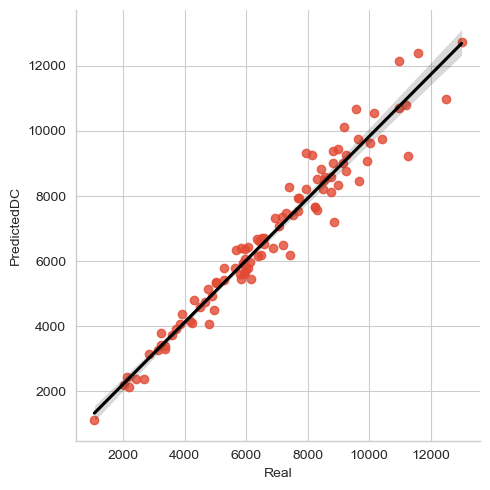

In [57]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedDC', data=dataset_dc, line_kws={'color': 'black'});

In [65]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

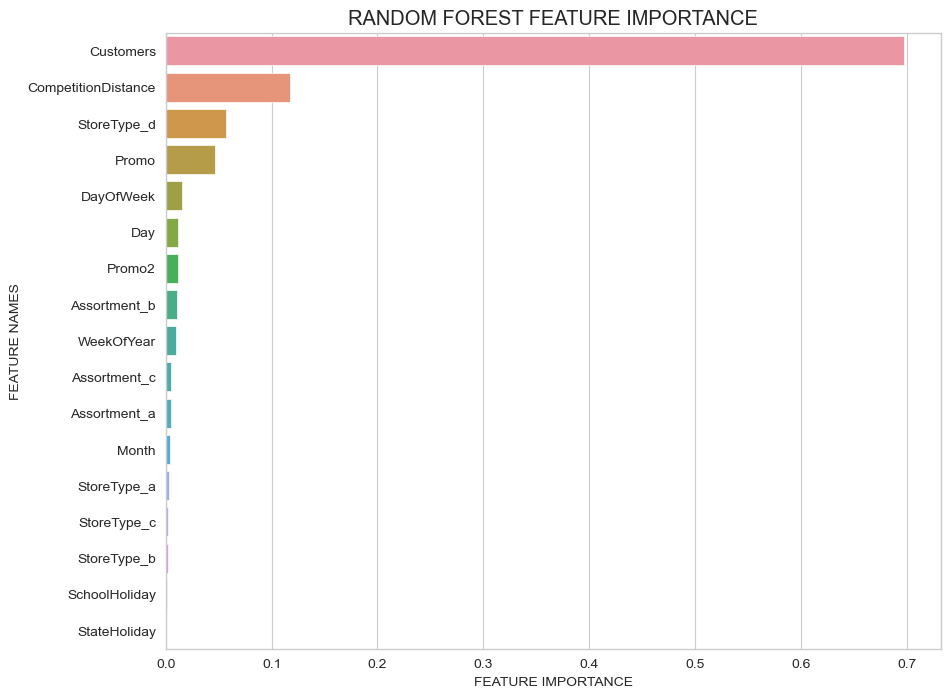

In [66]:
plot_feature_importance(rf_scaled.feature_importances_,columns[:],'RANDOM FOREST')

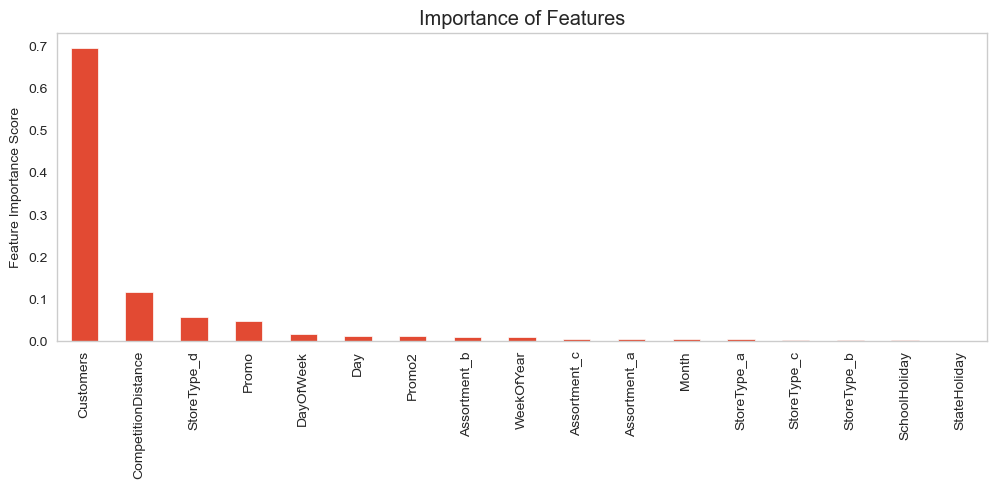

In [61]:
#Importance of feature
feat_imp = pd.Series(rf_scaled.feature_importances_, list(X_train)).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 4))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()